In [1]:
from keras.layers import Conv2D
from keras.layers import Input
from keras.layers import MaxPooling2D, UpSampling2D
from keras.models import Model
from keras.datasets.mnist import load_data
from keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

In [3]:
(xtrain, _), (xtest, _) = load_data()
xtrain = xtrain.astype('float32') / 255
xtest = xtest.astype('float32') / 255
 
print(xtrain.shape, xtest.shape)

x_train = np.reshape(xtrain, (len(xtrain), 28, 28, 1)) 
x_test = np.reshape(xtest, (len(xtest), 28, 28, 1))
 
print(x_train.shape, x_test.shape) 

(60000, 28, 28) (10000, 28, 28)
(60000, 28, 28, 1) (10000, 28, 28, 1)


In [4]:
class AutoEncoder():
    def __init__(self,x_train,x_test):
        self.x_train = x_train
        self.x_test = x_test
        # print(self.x_train.shape, self.x_test.shape) 

    def _encoder(self):
        input_img = Input(shape=(28, 28,1))
        enc_conv1 = Conv2D(12, (3, 3), activation='relu', padding='same')(input_img)
        enc_pool1 = MaxPooling2D((2, 2), padding='same')(enc_conv1)
        enc_conv2 = Conv2D(8, (4, 4), activation='relu', padding='same')(enc_pool1)
        enc_ouput = MaxPooling2D((4, 4), padding='same')(enc_conv2)
        model = Model(input_img, enc_ouput)
        self.encoder = model
        return model

    def _decoder(self):
        dec_input = Input(shape=(4,4,8))        
        dec_conv2 = Conv2D(8, (4, 4), activation='relu', padding='same')(dec_input)
        dec_upsample2 = UpSampling2D((4, 4))(dec_conv2)
        dec_conv3 = Conv2D(12, (3, 3), activation='relu')(dec_upsample2)
        dec_upsample3 = UpSampling2D((2, 2))(dec_conv3)
        dec_output = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(dec_upsample3)
        model = Model(dec_input, dec_output)
        self.decoder = model
        return model

    def encoder_decoder(self):
        enc = self._encoder()
        dec = self._decoder()
        inputs = Input(shape=(28,28,1))
        enc_out = enc(inputs)
        dec_out = dec(enc_out)
        model = Model(inputs, dec_out)
        self.model = model
        return model

    def fit(self, batch_size=128, epochs=20):
        self.model.compile(optimizer='nadam',loss='binary_crossentropy')
        # self.model.compile(optimizer='rmsprop',loss='binary_crossentropy')
        self.model.fit(self.x_train, self.x_train, epochs=epochs, batch_size=batch_size)

    def save_model(self):
        self.encoder.save('./weights/encoder_weights.h5')
        self.decoder.save('./weights/decoder_weights.h5')
        self.model.save('./weights/autoencoder_weights.h5')


In [5]:
ae = AutoEncoder(x_train,x_test)
ae.encoder_decoder()
ae.fit(batch_size=128,epochs=30)
ae.save_model()

Epoch 1/30
469/469 [==============================] - 2s 4ms/step - loss: 0.2299
Epoch 2/30
469/469 [==============================] - 2s 4ms/step - loss: 0.1636
Epoch 3/30
469/469 [==============================] - 2s 4ms/step - loss: 0.1511
Epoch 4/30
469/469 [==============================] - 2s 4ms/step - loss: 0.1446
Epoch 5/30
469/469 [==============================] - 2s 4ms/step - loss: 0.1397
Epoch 6/30
469/469 [==============================] - 2s 4ms/step - loss: 0.1362
Epoch 7/30
469/469 [==============================] - 2s 4ms/step - loss: 0.1338
Epoch 8/30
469/469 [==============================] - 2s 5ms/step - loss: 0.1318
Epoch 9/30
469/469 [==============================] - 2s 4ms/step - loss: 0.1302
Epoch 10/30
469/469 [==============================] - 2s 4ms/step - loss: 0.1287
Epoch 11/30
469/469 [==============================] - 2s 4ms/step - loss: 0.1277
Epoch 12/30
469/469 [==============================] - 2s 5ms/step - loss: 0.1265
Epoch 13/30
469/469 [====

In [6]:
encoder = load_model('./weights/encoder_weights.h5',compile=False)
decoder = load_model('./weights/decoder_weights.h5',compile=False)

In [7]:
inputs = x_test[3].reshape(1,28,28,1)
x = encoder.predict(inputs)
y = decoder.predict(x)

# print(inputs.shape)
print(x.reshape(16,8))
# print(y.shape)

[[8.82942915e-01 5.70045263e-02 1.39397526e+00 1.92232764e+00
  1.04879141e-02 2.91445136e-01 0.00000000e+00 1.27234375e+00]
 [4.25552225e+00 1.03964746e+00 3.40744638e+00 2.98287106e+00
  4.94041395e+00 2.48773718e+00 2.88704944e+00 4.12741423e+00]
 [3.15535498e+00 3.50597405e+00 4.23183966e+00 5.63541651e-01
  4.04093075e+00 5.64033937e+00 2.07368469e+00 3.37233710e+00]
 [1.74875855e-01 2.06282839e-01 2.53712440e+00 7.18988240e-01
  0.00000000e+00 2.06162691e-01 1.94292977e-01 2.91666389e-03]
 [2.81759882e+00 4.33812737e-02 1.77786899e+00 3.88515306e+00
  1.81029058e+00 5.68779469e-01 2.59013844e+00 3.41844988e+00]
 [7.73203611e+00 4.86670351e+00 3.63688707e+00 3.27670240e+00
  5.67506456e+00 6.93289375e+00 4.90304995e+00 3.83970022e+00]
 [7.65971470e+00 4.78147173e+00 3.35546660e+00 4.21006346e+00
  4.77973843e+00 6.94468832e+00 4.17507458e+00 4.29140234e+00]
 [1.18053591e+00 4.23571825e+00 3.92473102e+00 2.99935013e-01
  9.21439767e-01 6.24375582e+00 6.55419886e-01 1.23201418e+00]


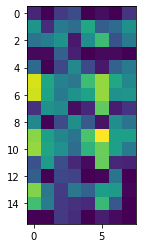

In [8]:
plt.imshow(x.reshape(16,8))

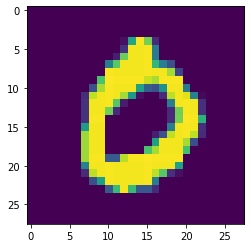

In [9]:
plt.imshow(inputs.reshape(28, 28))

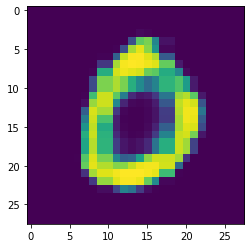

In [10]:
plt.imshow(y.reshape(28, 28))